In [58]:
import pandas as pd
import numpy as np
import keras
import sklearn
from keras.preprocessing.sequence import pad_sequences

,Year,Rider ID,Age,Price,Score 1ya,Score,Country_ARG,Country_AUS,Country_AUT,Country_BEL,...,UCI Team_WGN,UCI Team_WIL,UCI Team_WVA,UCI Team_XAC,UCI Team_XYZ,UCI Team_YEL,UCI Team_ZZZ,UCI Cat_CONT,UCI Cat_PROF,UCI Cat_WT
0,2010,1.0,-0.177201,2.599594,2.461370,2.254926,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2011,1.0,0.044128,2.311484,2.236683,2.835756,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2012,1.0,0.265457,2.457942,2.827685,1.847519,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2013,1.0,0.486786,2.599594,1.822141,1.072212,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,1.0,0.708115,1.293029,1.033254,2.830965,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12759,2020,3770.0,-0.619858,-0.746074,0.105276,-1.399711,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12905,2017,3811.0,-1.062516,-1.072715,-1.481964,-0.480520,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12906,2018,3811.0,-0.841187,-1.072715,-0.546674,0.160208,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12907,2019,3811.0,-0.619858,-0.284133,0.105276,-0.420007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


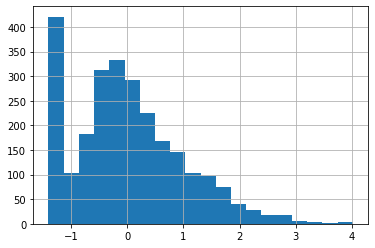

In [258]:
df = pd.read_csv('../data/Men_Long.csv')

# Split the dataset into higher-performance vs. lower-performance riders
split = men.groupby('Rider ID').agg({'Price': 'median', 'Score': ['median', 'count', np.count_nonzero]})
split['pct_nonzero'] = split[('Score', 'count_nonzero')] / split[('Score', 'count')]

# Keep only high-performance riders (we will later fill in some generic assumption for low-performance riders)
df = df[df['Rider ID'].isin(split[(split[('Price', 'median')] > 1) \
                                  & (split[('Score', 'median')] > 99) & (split['pct_nonzero'] > 0.5)].index)]

# Z-score and log-transform numerical variables
df['Age'] = sklearn.preprocessing.scale(df['Age'])
for field in ['Price', 'Score 1ya', 'Score']:
    df[field] = sklearn.preprocessing.scale(df[field]**0.5)
#     df[field] = sklearn.preprocessing.scale(np.log(df[field] + 1))

# One-hot encode categorical variables
df = pd.get_dummies(df.drop('Rider Name', axis = 1))

df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC425832C8>,
      dtype=object)

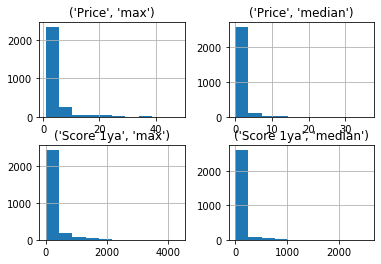

In [211]:
men = pd.read_csv('../data/Men_Long.csv')
men.groupby('Rider Name').agg({'Price': ['median', max], 'Score 1ya': ['median', max]}) \
                         .sort_values(('Score 1ya', 'median')) \
                         .hist()

In [247]:
split = men.groupby('Rider ID').agg({'Price': 'median', 'Score': ['median', 'count', np.count_nonzero]})
split['pct_nonzero'] = split[('Score', 'count_nonzero')] / split[('Score', 'count')]

big_boys = df[df['Rider ID'].isin(split[(split[('Price', 'median')] > 1) & (split[('Score', 'median')] > 99) & (split['pct_nonzero'] > 0.5)].index)]
big_boys['Score'].hist(bins = 20)
split

Price   Score                     pct_nonzero
         median  median count count_nonzero            
Rider ID                                               
1.0        29.0  1869.5     8           8.0    1.000000
2.0        32.0  2233.0    11           8.0    0.727273
3.0        26.0  1534.0     7           7.0    1.000000
4.0        22.0   855.0    11          10.0    0.909091
5.0        22.0   930.0     5           5.0    1.000000
...         ...     ...   ...           ...         ...
4589.0      1.0     0.0     1           0.0    0.000000
4590.0      1.0     0.0     1           0.0    0.000000
4591.0      1.0     0.0     1           0.0    0.000000
4594.0      1.0     0.0     1           0.0    0.000000
4595.0      1.0     0.0     1           0.0    0.000000

[2785 rows x 5 columns]

In [249]:
split[split['pct_nonzero'] > 0.5]

Price   Score                     pct_nonzero
         median  median count count_nonzero            
Rider ID                                               
1.0        29.0  1869.5     8           8.0    1.000000
2.0        32.0  2233.0    11           8.0    0.727273
3.0        26.0  1534.0     7           7.0    1.000000
4.0        22.0   855.0    11          10.0    0.909091
5.0        22.0   930.0     5           5.0    1.000000
...         ...     ...   ...           ...         ...
4141.0      1.0    80.0     3           2.0    0.666667
4143.0      1.0    40.0     3           2.0    0.666667
4150.0      1.0    10.0     3           2.0    0.666667
4154.0      1.0    30.0     3           2.0    0.666667
4242.0      1.0    14.0     1           1.0    1.000000

[821 rows x 5 columns]

In [257]:
split[(split[('Score', 'median')] > 99) & (split['pct_nonzero'] > 0.5)]

Price   Score                     pct_nonzero
         median  median count count_nonzero            
Rider ID                                               
1.0        29.0  1869.5     8           8.0    1.000000
2.0        32.0  2233.0    11           8.0    0.727273
3.0        26.0  1534.0     7           7.0    1.000000
4.0        22.0   855.0    11          10.0    0.909091
5.0        22.0   930.0     5           5.0    1.000000
...         ...     ...   ...           ...         ...
4037.0      1.0   110.0     3           2.0    0.666667
4039.0      1.0   100.0     3           2.0    0.666667
4086.0      1.0   100.0     3           2.0    0.666667
4111.0      1.0   120.0     3           2.0    0.666667
4119.0      1.0   163.0     3           2.0    0.666667

[383 rows x 5 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC42B10308>,
      dtype=object)

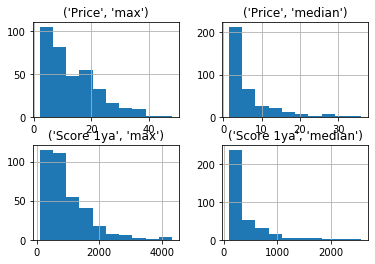

In [227]:
split[(split[('Price', 'median')] > 1) & (split[('Score 1ya', 'median')] > 99)] \
                         .sort_values(('Score 1ya', 'median')) \
                         .hist()

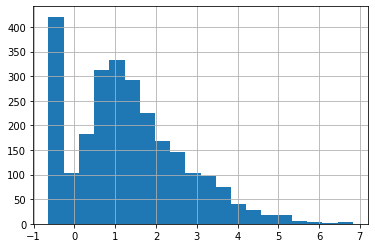

In [256]:
big_boys = df[df['Rider ID'].isin(split[(split[('Price', 'median')] > 1) & (split[('Score', 'median')] > 99) & (split['pct_nonzero'] > 0.5)].index)]
big_boys['Score'].hist(bins = 20)

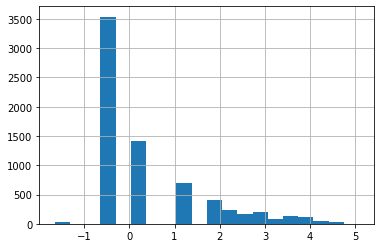

In [149]:
train_df = df[df['Year'] < 2019] # train on 2010-2018 data
test_df = df[(df['Year'] > 2010) & (df['Year'] < 2020)] # test on 2011-2019 data

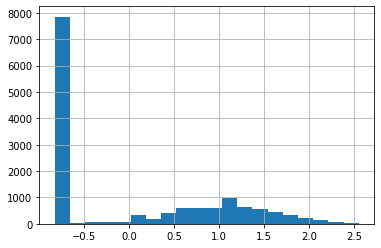

In [96]:
%matplotlib inline

df['Score'].hist(bins = 20)

In [130]:
def build_data(df, pad_value=-99):
    data = []
    labels = []

    for rider_id in df['Rider ID'].unique():
        this_df = df[df['Rider ID'] == rider_id]
        while len(this_df):
            data.append(this_df.iloc[:, 3:].drop('Score', axis = 1).to_numpy())
            labels.append(this_df.loc[:, 'Score'].to_numpy())
            this_df = this_df[:-1]
        if not rider_id % 100:
            print('Processed rider ID', rider_id)
#         data.append(np.array(df[df['Rider ID'] == rider_id].iloc[:, 3:-1]))
#         labels.append(np.array(df[df['Rider ID'] == rider_id].iloc[:, -1]))

#     data = np.array(data)
#     labels = np.array(labels)
    data = pad_sequences(data, value = pad_value)
    labels = pad_sequences(labels, value = pad_value)
#     labels = labels.reshape(labels.shape + (1,))
    return data, labels

In [131]:
train_X, train_y = build_data(train_df)

Processed rider ID 100.0
Processed rider ID 200.0
Processed rider ID 300.0
Processed rider ID 400.0
Processed rider ID 500.0
Processed rider ID 600.0
Processed rider ID 700.0
Processed rider ID 800.0
Processed rider ID 900.0
Processed rider ID 1000.0
Processed rider ID 1100.0
Processed rider ID 1200.0
Processed rider ID 1300.0
Processed rider ID 1400.0
Processed rider ID 2700.0
Processed rider ID 2800.0
Processed rider ID 3000.0
Processed rider ID 3200.0
Processed rider ID 3300.0
Processed rider ID 3400.0
Processed rider ID 3600.0
Processed rider ID 3800.0
Processed rider ID 3900.0
Processed rider ID 4000.0


In [100]:
train_X

array([[[-99, -99, -99, ..., -99, -99, -99],
        [  4,   2,   0, ...,   0,   0,   1],
        [  4,   2,   0, ...,   0,   0,   1],
        ...,
        [  4,   2,   0, ...,   0,   0,   1],
        [  3,   2,   0, ...,   0,   0,   1],
        [  3,   2,   0, ...,   0,   0,   1]],

       [[-99, -99, -99, ..., -99, -99, -99],
        [-99, -99, -99, ..., -99, -99, -99],
        [  4,   2,   0, ...,   0,   0,   1],
        ...,
        [  3,   1,   0, ...,   0,   0,   1],
        [  4,   2,   0, ...,   0,   0,   1],
        [  3,   2,   0, ...,   0,   0,   1]],

       [[-99, -99, -99, ..., -99, -99, -99],
        [-99, -99, -99, ..., -99, -99, -99],
        [-99, -99, -99, ..., -99, -99, -99],
        ...,
        [  4,   2,   0, ...,   0,   0,   1],
        [  3,   1,   0, ...,   0,   0,   1],
        [  4,   2,   0, ...,   0,   0,   1]],

       ...,

       [[-99, -99, -99, ..., -99, -99, -99],
        [-99, -99, -99, ..., -99, -99, -99],
        [-99, -99, -99, ..., -99, -99, -99

In [101]:
train_X.shape

(11524, 9, 606)

In [135]:
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Masking
from keras.layers import Dense
from keras.layers import LSTM
# # create sequence
# length = 10
# sequence = [i/float(length) for i in range(length)]
# # create X/y pairs
# df = DataFrame(sequence)
# df = concat([df, df.shift(1)], axis=1)
# df.dropna(inplace=True)
# # convert to LSTM friendly format
# values = df.values
# X, y = values[:, 0], values[:, 1]
# X = X.reshape(len(X), 1, 1)
# configure network
n_batch = len(train_X)
n_epoch = 100
n_neurons = 128
# design network
model = Sequential()
model.add(Masking(-99, input_shape = train_X.shape[1:]))
# model.add(LSTM(n_neurons))
# model.add(LSTM(n_neurons))
model.add(LSTM(n_neurons, return_sequences = True))
model.add(LSTM(n_neurons, return_sequences = False))
# model.add(LSTM(n_neurons, stateful=True))
# model.add(LSTM(n_neurons, stateful=True))
# model.add(LSTM(n_neurons, stateful=True))
model.add(Dense(train_y.shape[-1]))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit network
model.fit(train_X, train_y, epochs=n_epoch, batch_size=n_batch, verbose=1, shuffle=False)
# for i in range(n_epoch):
#     model.fit(train_X, train_y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
#     model.reset_states()
# # online forecast
# for i in range(len(X)):
#     testX, testy = X[i], y[i]
#     testX = testX.reshape(1, 1, 1)
#     yhat = model.predict(testX, batch_size=1)
#     print('>Expected=%.1f, Predicted=%.1f' % (testy, yhat))

Epoch 1/100
11524/11524 [==============================] - 10s 878us/step - loss: 5958.7261
Epoch 2/100
11524/11524 [==============================] - 8s 695us/step - loss: 5957.2773
Epoch 3/100
11524/11524 [==============================] - 8s 663us/step - loss: 5955.7930
Epoch 4/100
11524/11524 [==============================] - 9s 739us/step - loss: 5954.3389
Epoch 5/100
11524/11524 [==============================] - 13s 1ms/step - loss: 5952.6694
Epoch 6/100
11524/11524 [==============================] - 14s 1ms/step - loss: 5950.7090
Epoch 7/100
11524/11524 [==============================] - 15s 1ms/step - loss: 5948.3652
Epoch 8/100
11524/11524 [==============================] - 9s 802us/step - loss: 5945.5161
Epoch 9/100
11524/11524 [==============================] - 8s 736us/step - loss: 5941.9487
Epoch 10/100
11524/11524 [==============================] - 8s 728us/step - loss: 5937.5215
Epoch 11/100
11524/11524 [==============================] - 8s 714us/step - loss: 5932.0264

11524/11524 [==============================] - 8s 662us/step - loss: 4392.1865
Epoch 91/100
11524/11524 [==============================] - 8s 676us/step - loss: 4374.7944
Epoch 92/100
11524/11524 [==============================] - 8s 657us/step - loss: 4357.4658
Epoch 93/100
11524/11524 [==============================] - 8s 670us/step - loss: 4340.2090
Epoch 94/100
11524/11524 [==============================] - 8s 671us/step - loss: 4323.0273
Epoch 95/100
11524/11524 [==============================] - 7s 639us/step - loss: 4305.9268
Epoch 96/100
11524/11524 [==============================] - 8s 653us/step - loss: 4288.9131
Epoch 97/100
11524/11524 [==============================] - 7s 626us/step - loss: 4271.9917
Epoch 98/100
11524/11524 [==============================] - 8s 708us/step - loss: 4255.1670
Epoch 99/100
11524/11524 [==============================] - 10s 876us/step - loss: 4238.4443
Epoch 100/100
11524/11524 [==============================] - 8s 733us/step - loss: 4221.8276

In [181]:
train_X, train_y = build_test_data(train_df)

Processed rider ID 100.0
Processed rider ID 200.0
Processed rider ID 300.0
Processed rider ID 400.0
Processed rider ID 500.0
Processed rider ID 600.0
Processed rider ID 700.0
Processed rider ID 800.0
Processed rider ID 900.0
Processed rider ID 1000.0
Processed rider ID 1100.0
Processed rider ID 1200.0
Processed rider ID 1300.0
Processed rider ID 1400.0
Processed rider ID 2700.0
Processed rider ID 2800.0
Processed rider ID 3000.0
Processed rider ID 3200.0
Processed rider ID 3300.0
Processed rider ID 3400.0
Processed rider ID 3600.0
Processed rider ID 3800.0
Processed rider ID 3900.0
Processed rider ID 4000.0


In [182]:
model2 = Sequential()
model2.add(Masking(-99, input_shape = train_X.shape[1:]))
# model.add(LSTM(n_neurons))
# model.add(LSTM(n_neurons))
model2.add(LSTM(n_neurons, return_sequences = True))
model2.add(LSTM(n_neurons, return_sequences = False))
# model.add(LSTM(n_neurons, stateful=True))
# model.add(LSTM(n_neurons, stateful=True))
# model.add(LSTM(n_neurons, stateful=True))
model2.add(Dense(train_y.shape[-1]))
model2.compile(loss='mean_squared_error', optimizer='adam')
# fit network
model2.fit(train_X, train_y, epochs=100, verbose=1, shuffle=False)


Epoch 1/100
2517/2517 [==============================] - 5s 2ms/step - loss: 4199.2078
Epoch 2/100
2517/2517 [==============================] - 4s 2ms/step - loss: 3362.0227
Epoch 3/100
2517/2517 [==============================] - 4s 2ms/step - loss: 2809.4477
Epoch 4/100
2517/2517 [==============================] - 4s 2ms/step - loss: 2434.9738
Epoch 5/100
2517/2517 [==============================] - 4s 2ms/step - loss: 2191.0648
Epoch 6/100
2517/2517 [==============================] - 4s 2ms/step - loss: 2030.5003
Epoch 7/100
2517/2517 [==============================] - 4s 2ms/step - loss: 1925.7685
Epoch 8/100
2517/2517 [==============================] - 4s 2ms/step - loss: 1858.9146
Epoch 9/100
2517/2517 [==============================] - 4s 2ms/step - loss: 1817.4913
Epoch 10/100
2517/2517 [==============================] - 4s 2ms/step - loss: 1792.7500
Epoch 11/100
2517/2517 [==============================] - 4s 2ms/step - loss: 1778.6325
Epoch 12/100
2517/2517 [=================

2517/2517 [==============================] - 5s 2ms/step - loss: 1767.8295
Epoch 95/100
2517/2517 [==============================] - 5s 2ms/step - loss: 1767.8094
Epoch 96/100
2517/2517 [==============================] - 5s 2ms/step - loss: 1767.7893
Epoch 97/100
2517/2517 [==============================] - 5s 2ms/step - loss: 1767.7692
Epoch 98/100
2517/2517 [==============================] - 5s 2ms/step - loss: 1767.7490: 0s - loss: 1726.81 - ETA: 0s - los
Epoch 99/100
2517/2517 [==============================] - 5s 2ms/step - loss: 1767.7289
Epoch 100/100
2517/2517 [==============================] - 5s 2ms/step - loss: 1767.7087


In [136]:
model.save_weights('weights.h5')

In [137]:
model.fit(train_X, train_y, epochs = 50, verbose = 1, shuffle = False)

Epoch 1/50
11524/11524 [==============================] - 20s 2ms/step - loss: 2619.6161
Epoch 2/50
11524/11524 [==============================] - 19s 2ms/step - loss: 1673.0375
Epoch 3/50
11524/11524 [==============================] - 20s 2ms/step - loss: 1564.9883
Epoch 4/50
11524/11524 [==============================] - 19s 2ms/step - loss: 1557.7786
Epoch 5/50
11524/11524 [==============================] - 19s 2ms/step - loss: 1559.4160
Epoch 6/50
11524/11524 [==============================] - 19s 2ms/step - loss: 1559.4943
Epoch 7/50
11524/11524 [==============================] - 20s 2ms/step - loss: 1559.1213
Epoch 8/50
11524/11524 [==============================] - 20s 2ms/step - loss: 1558.6776
Epoch 9/50
11524/11524 [==============================] - 19s 2ms/step - loss: 1558.2221
Epoch 10/50
11524/11524 [==============================] - 20s 2ms/step - loss: 1557.7661
Epoch 11/50
11524/11524 [==============================] - 20s 2ms/step - loss: 1557.3168
Epoch 12/50
11524/1

In [194]:
def build_data_unpadded(df):
    data = []
    labels = []

    for rider_id in df['Rider ID'].unique():
        this_df = df[df['Rider ID'] == rider_id]
        data.append(this_df.iloc[:, 3:].drop('Score', axis = 1).to_numpy())
        labels.append(this_df.loc[:, 'Score'].to_numpy())
        if not rider_id % 100:
            print('Processed rider ID', rider_id)
            
#     data = np.array(data)
#     labels = np.array(labels)
    return data, labels

In [195]:
train_X, train_y = build_data_unpadded(train_df)

Processed rider ID 100.0
Processed rider ID 200.0
Processed rider ID 300.0
Processed rider ID 400.0
Processed rider ID 500.0
Processed rider ID 600.0
Processed rider ID 700.0
Processed rider ID 800.0
Processed rider ID 900.0
Processed rider ID 1000.0
Processed rider ID 1100.0
Processed rider ID 1200.0
Processed rider ID 1300.0
Processed rider ID 1400.0
Processed rider ID 2700.0
Processed rider ID 2800.0
Processed rider ID 3000.0
Processed rider ID 3200.0
Processed rider ID 3300.0
Processed rider ID 3400.0
Processed rider ID 3600.0
Processed rider ID 3800.0
Processed rider ID 3900.0
Processed rider ID 4000.0


In [202]:
model3 = Sequential()
model3.add(LSTM(n_neurons, batch_input_shape = (None, len(train_X[0]))))
model3.add(LSTM(n_neurons / 2))
model3.add(Dense(len(train_y[0])))
model3.compile(loss='mean_squared_error', optimizer='adam')
# fit network
model3.fit(train_X, train_y, epochs=50, batch_size = 1, verbose=1, shuffle=False)


ValueError: Input 0 is incompatible with layer lstm_50: expected ndim=3, found ndim=2

In [197]:
train_X[0].shape

(8, 606)

In [138]:
model.save_weights('weights_2.h5')

In [150]:
def build_test_data(df, pad_value=-99):
    data = []
    labels = []

    for rider_id in df['Rider ID'].unique():
        this_df = df[df['Rider ID'] == rider_id]
        data.append(this_df.iloc[:, 3:].drop('Score', axis = 1).to_numpy())
        labels.append(this_df.loc[:, 'Score'].to_numpy())
        if not rider_id % 100:
            print('Processed rider ID', rider_id)
    #         data.append(np.array(df[df['Rider ID'] == rider_id].iloc[:, 3:-1]))
    #         labels.append(np.array(df[df['Rider ID'] == rider_id].iloc[:, -1]))

    #     data = np.array(data)
    #     labels = np.array(labels)
    data = pad_sequences(data, value = pad_value)
    labels = pad_sequences(labels, value = pad_value)
#     labels = labels.reshape(labels.shape + (1,))
    return data, labels

test_X, test_y = build_test_data(test_df)

Processed rider ID 100.0
Processed rider ID 200.0
Processed rider ID 300.0
Processed rider ID 400.0
Processed rider ID 500.0
Processed rider ID 600.0
Processed rider ID 700.0
Processed rider ID 800.0
Processed rider ID 900.0
Processed rider ID 1000.0
Processed rider ID 1100.0
Processed rider ID 1200.0
Processed rider ID 1300.0
Processed rider ID 1400.0
Processed rider ID 2700.0
Processed rider ID 2800.0
Processed rider ID 3000.0
Processed rider ID 3200.0
Processed rider ID 3300.0
Processed rider ID 3400.0
Processed rider ID 3600.0
Processed rider ID 3800.0
Processed rider ID 3900.0
Processed rider ID 4000.0
Processed rider ID 4300.0


In [151]:
test_X.shape

(2462, 9, 606)

In [183]:
yhat = model2.predict(test_X)#, batch_size=1)

In [184]:
yhat.shape

(2462, 9)

In [185]:
final_predictions = pd.Series([array[-1] for array in yhat])
validation_df = test_df.groupby('Rider ID')[['Score 1ya', 'Score']].agg('last')
validation_df = validation_df.reset_index()
validation_df = pd.concat([validation_df, final_predictions], axis = 1).set_index('Rider ID')
validation_df

,Score 1ya,Score,0
Rider ID,,,
1.0,2.161563,2.139439,0.086509
2.0,2.407648,2.390995,0.086509
3.0,1.556608,2.111607,0.086508
4.0,0.858826,0.139172,0.086509
5.0,1.731161,1.930813,0.086439
...,...,...,...
4379.0,-0.847009,0.891932,0.061620
4380.0,-0.847009,1.139188,0.061621
4381.0,-0.847009,1.168883,0.061620


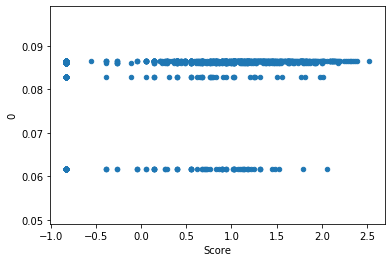

In [186]:
validation_df.plot('Score', 0, kind = 'scatter')

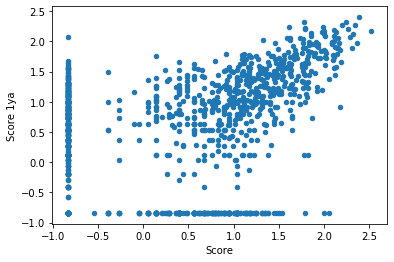

In [180]:
validation_df.plot('Score', 'Score 1ya', kind = 'scatter')